In [1]:
pip install pandas-profiling

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


  Attempting uninstall: astroid
    Found existing installation: astroid 2.5
    Uninstalling astroid-2.5:
      Successfully uninstalled astroid-2.5


In [3]:
#폰트 설정
sns.set(font="Malgun Gothic", rc={"axes.unicode_minus":False},style='darkgrid')

<AxesSubplot:title={'center':'한글폰트'}>

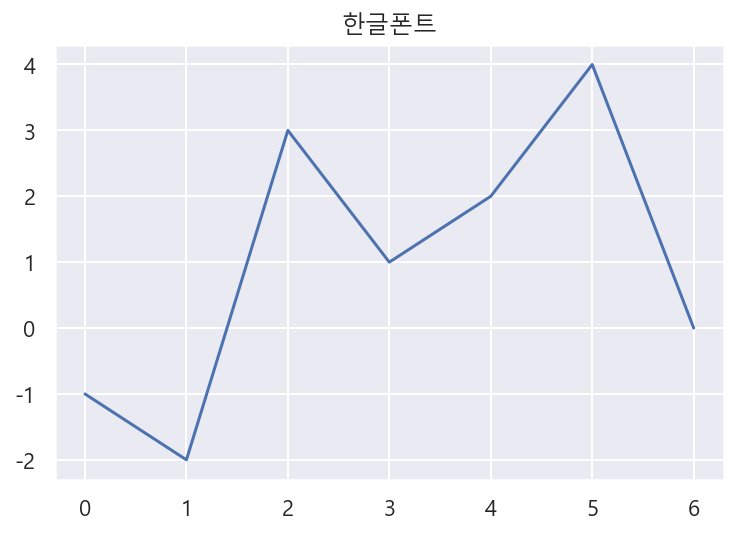

In [4]:
#폰트를 더 선명하게
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")
pd.Series([-1,-2,3,1,2,4,0]).plot(title="한글폰트")

In [5]:
file = f"전국도시공원.csv"
file

'전국도시공원.csv'

In [6]:
df = pd.read_csv(file, encoding = "cp949")
df.shape

(18137, 20)

In [7]:
import pandas_profiling
pandas_profiling?

In [8]:
from pandas_profiling import ProfileReport

%time profile = ProfileReport(df, title="도시공원 표준 데이터")

profile.to_file(output_file="05-park_pandas_profile.html")

Wall time: 3min 7s


In [7]:
df.head(1)

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,Unnamed: 19
0,26440-00001,구랑공원,문화공원,NaN,부산광역시 강서구 구랑동 1199-7,35.157215,128.854935,9137.0,4,NaN,화장실,NaN,"팔각정자, 파고라2, 평의자6, 앉음벽14.38m, 축구장(골대2), 컨테이너, 안...",2011-09-02,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN


In [8]:
df.columns

Index(['관리번호', '공원명', '공원구분', '소재지도로명주소', '소재지지번주소', '위도', '경도', '공원면적',
       '공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명', '전화번호', '데이터기준일자', '제공기관코드', '제공기관명',
       'Unnamed: 19'],
      dtype='object')

Pandas Profiling 사용해보기

In [9]:
import pandas_profiling

In [10]:
# pandas_profiling 의 ProfileReport 를 불러와 표현합니다.
# 이 때 title은 "도시공원 표준 데이터" 로 하고 주피터 노트북에서 바로 보면 iframe을 통해 화면이 작게 보이기 때문에
# 별도의 html 파일로 생성해서 그려보세요.
#from pandas_profiling import ProfileReport
#import matplotlib 
#matplotlib.font_manager._rebuild()

# 운영체제에 맞는 폰트를 설정해 주세요.
# Win
#plt.rc("font", family="Malgun Gothic")
# Mac
# plt.rc("font", family="AppleGothic")
# 위 폰트 설정 방법으로 오류가 난다면 아래의 seaborn set을 통해 설정해 보세요.

#sns.set(font="Malgun Gothic")
# Mac
#sns.set(font="AppleGothic")

#%time profile = ProfileReport(df, title="도시공원 표준 데이터")
#profile.to_file(output_file="05-park_pandas_profile.html")


In [11]:
df.isnull().sum()

관리번호                0
공원명                 0
공원구분                0
소재지도로명주소        10098
소재지지번주소           979
위도                  0
경도                  0
공원면적                0
공원보유시설(운동시설)    13292
공원보유시설(유희시설)    11173
공원보유시설(편익시설)    13053
공원보유시설(교양시설)    16977
공원보유시설(기타시설)    15021
지정고시일            2912
관리기관명             754
전화번호             1180
데이터기준일자             0
제공기관코드              0
제공기관명               0
Unnamed: 19     18137
dtype: int64

In [12]:
df.isnull().mean() #결측치의 비율
df.isnull().mean() *100 #퍼센트값
round(df.isnull().mean()*100,2)
#결측치가 많은 것들
#소재지도로명주소         55.68
#공원보유시설(운동시설)     73.29
#공원보유시설(유희시설)     61.60
#공원보유시설(편익시설)     71.97
#공원보유시설(교양시설)     93.60
#공원보유시설(기타시설)     82.82

관리번호              0.00
공원명               0.00
공원구분              0.00
소재지도로명주소         55.68
소재지지번주소           5.40
위도                0.00
경도                0.00
공원면적              0.00
공원보유시설(운동시설)     73.29
공원보유시설(유희시설)     61.60
공원보유시설(편익시설)     71.97
공원보유시설(교양시설)     93.60
공원보유시설(기타시설)     82.82
지정고시일            16.06
관리기관명             4.16
전화번호              6.51
데이터기준일자           0.00
제공기관코드            0.00
제공기관명             0.00
Unnamed: 19     100.00
dtype: float64

In [13]:
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

<AxesSubplot:>

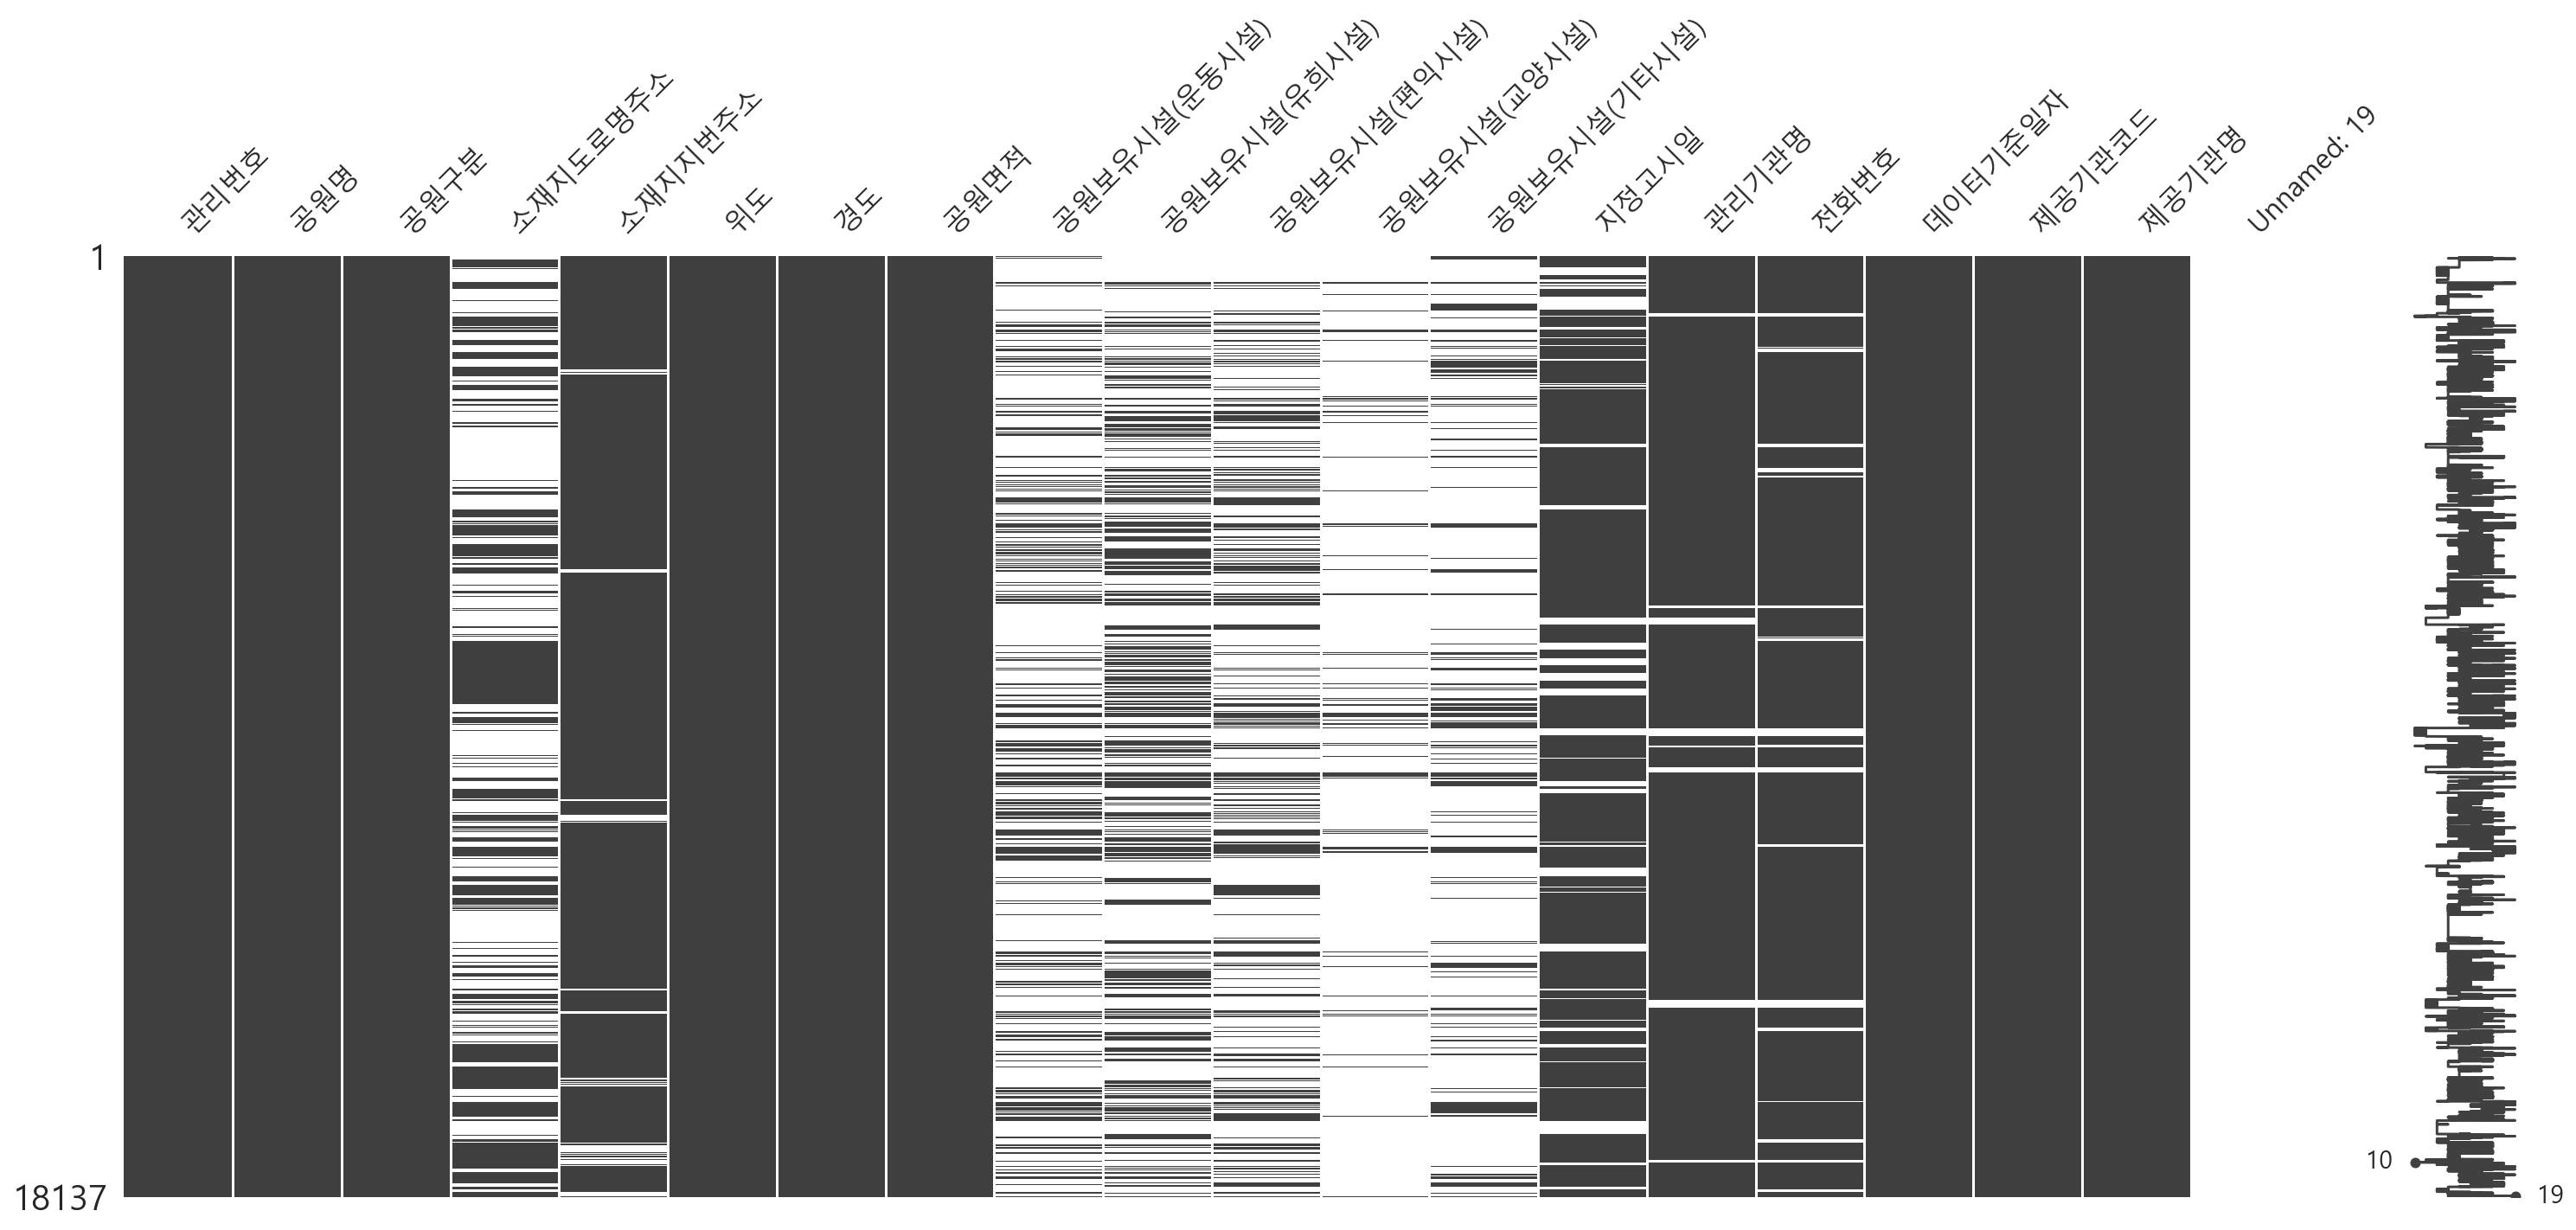

In [14]:
import missingno

missingno.matrix(df)

<AxesSubplot:>

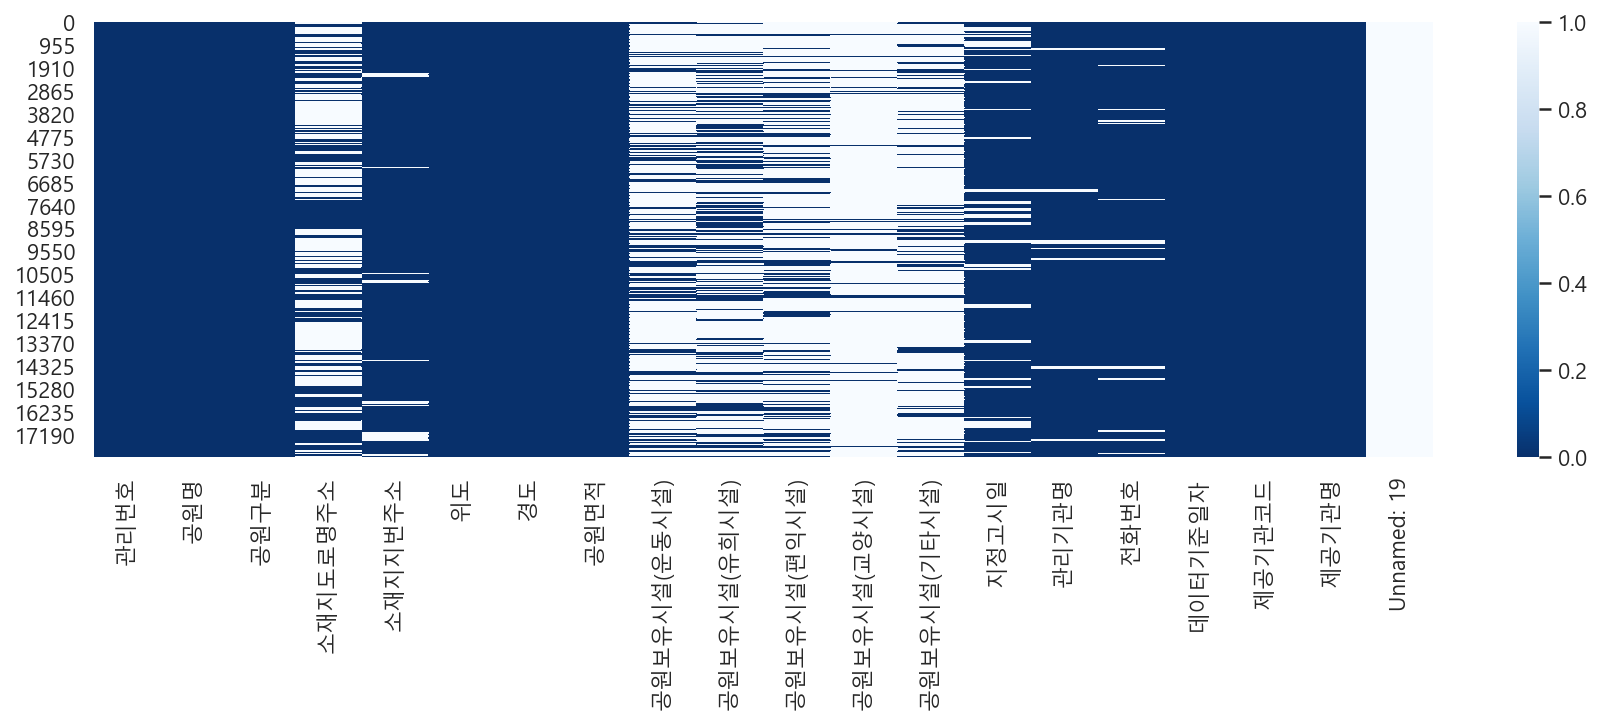

In [15]:
null = df.isnull()
plt.figure(figsize=(15,4))
sns.heatmap(null, cmap = "Blues_r") #


데이터 전처리

-불필요한 컬럼 제거
-시도 결측치 처리(다른 데이터로 대체, 도로명 혹은 지번 둘 중 하나만 있다면, 있는 데이터로 대체)

-아웃라이어 데이터 제거 혹은 대체

-위경도가 국내 범위를 벗어나는 데이터의 경우 제외하고 그리도록 처리

In [16]:
#전체 컬럼명을 출력해 봅니다.
df.columns

Index(['관리번호', '공원명', '공원구분', '소재지도로명주소', '소재지지번주소', '위도', '경도', '공원면적',
       '공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명', '전화번호', '데이터기준일자', '제공기관코드', '제공기관명',
       'Unnamed: 19'],
      dtype='object')

In [17]:
#drop으로 'Unnamed: 19'를 제거하기 #결측치만 잇는 컬럼 제거하는것.
print(df.shape)
df = df.drop(["Unnamed: 19"], axis=1)
print(df.shape)

(18137, 20)
(18137, 19)


In [18]:
#결측치 대체
#도로명 주소의 널값 수
df['소재지도로명주소'].isnull().sum()

10098

In [19]:
df['소재지지번주소'].isnull().sum()

979

In [20]:
#소재지도로명주소와 소재지지번주소가 모두 결측치가 아닌 데이터를 찾습니다.
df[df['소재지도로명주소'].notnull() & df['소재지지번주소'].notnull()].shape

(7060, 19)

In [21]:
df['소재지도로명주소'] = df['소재지도로명주소'].fillna(df['소재지지번주소'])
df['소재지도로명주소'].isnull().sum()

0

In [22]:
df[df['소재지도로명주소'].isnull() & df['소재지지번주소'].isnull()].shape

(0, 19)

In [23]:
#파생변수 만들기
#주소를 통한 시도, 구군 변수 생성하기
#소재지도로명주소로 시도, 구군 변수 생성하기
#.str.split('', expand=True)[0]을 통해 공백문자로 분리하고 리스트의 첫번째 값을 가져오도록 하기

In [24]:
df["시도"] = df["소재지도로명주소"].str.split(expand=True)[0]
df["구군"] = df["소재지도로명주소"].str.split(expand=True)[1]
df[["소재지도로명주소","시도","구군"]].sample(3)

,소재지도로명주소,시도,구군
2242,전라남도 여수시 미평11길 16,전라남도,여수시
13651,전라북도 군산시 나운동 781-1,전라북도,군산시
378,서울특별시 마포구 성산동200-326 등 19필지,서울특별시,마포구


In [25]:
#시도 데이터의 빈도수 세어보기
df["시도"].value_counts()

경기도        3318
전라남도       1882
경상남도       1825
서울특별시      1745
충청남도       1723
전라북도       1137
경상북도        917
충청북도        899
울산광역시       887
인천광역시       675
부산광역시       653
강원도         647
대구광역시       586
대전광역시       497
광주광역시       429
제주특별자치도     246
세종특별자치시      70
강원            1
Name: 시도, dtype: int64

In [26]:
#강우너은 "강원도"로 변경
df["시도"] = df["시도"].replace("강원","강원도")
df["시도"].value_counts()

경기도        3318
전라남도       1882
경상남도       1825
서울특별시      1745
충청남도       1723
전라북도       1137
경상북도        917
충청북도        899
울산광역시       887
인천광역시       675
부산광역시       653
강원도         648
대구광역시       586
대전광역시       497
광주광역시       429
제주특별자치도     246
세종특별자치시      70
Name: 시도, dtype: int64

<AxesSubplot:xlabel='경도', ylabel='위도'>

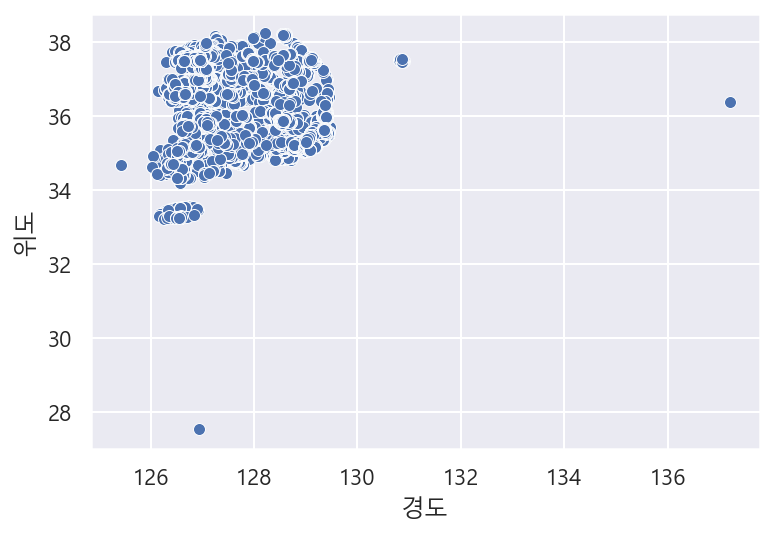

In [27]:
#이상치 제거하기
#위경도 시각화
sns.scatterplot(data=df, x="경도", y="위도")

In [28]:
#위 지도로 위도와 경도의 아웃라이어 데이터를 제외하고 출력해 봅니다.
#좀 더 정확하게 출력하려면 대한민국 위경도 데이터 범위를 다시 넣어줍니다.
#이상치를 제거한 데이터를 df_park라는 새로운 변수에 담습니다.
df_park = df[(df["경도"] < 132) & (df["위도"] > 32)].copy()

<AxesSubplot:xlabel='경도', ylabel='위도'>

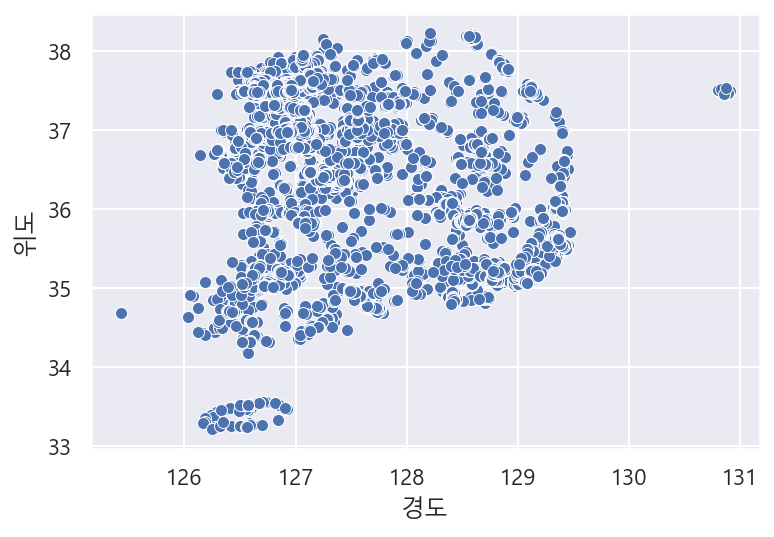

In [29]:
#위도 경도의 아웃라이어 데이터가 제거 되었는지 확인
sns.scatterplot(data=df_park , x="경도", y="위도")

In [30]:
#위경도가 잘못입력된 데이터를 봅니다
#주소가 잘못되지는 않았습니다.
#주소를 통해 위경도를 다시 받아 올 필요가 있습니다.
df[(df["경도"] > 132) | (df["위도"] < 32)]

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),...,공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,시도,구군
374,11440-00004,와우공원,근린공원,서울특별시 마포구 창전동3-231 등 59필지,서울특별시 마포구 창전동3-231 등 59필지,27.551606,126.929047,73590.0,NaN,NaN,...,NaN,NaN,1940-03-12,서울특별시 마포구,02-3153-9553,2019-07-22,3130000,서울특별시 마포구,서울특별시,마포구
12926,43113-00080,근린공원5(만수공원),근린공원,충청북도 청주시 흥덕구 오송읍 만수리 512,충청북도 청주시 흥덕구 오송읍 만수리 512,36.374204,137.202661,33258.0,NaN,NaN,...,NaN,NaN,2003-04-18,충청북도 청주시 푸른도시사업본부 공원관리과,043-201-4433,2019-06-21,5710000,충청북도 청주시,충청북도,청주시


In [31]:
df[["위도","경도"]].describe() #이상치 찾아보기 다른 방법

,위도,경도
count,18137.000000,18137.000000
mean,36.335922,127.543937
std,1.051835,0.892670
min,27.551606,125.430955
25%,35.275430,126.872301
50%,36.364729,127.130926
75%,37.404278,128.466193
max,38.224926,137.202661


In [32]:
#날짜 데이터 다루기
#지정고시일의 데이터 타입을 봅니다.
df["지정고시일"].head(1)

0    2011-09-02
Name: 지정고시일, dtype: object

In [33]:
#지정고시일의 데이터 타입을 datetime 형태로 변경합니다.
df["지정고시일"] = pd.to_datetime(df["지정고시일"])
df["지정고시일"].head(1)

0   2011-09-02
Name: 지정고시일, dtype: datetime64[ns]

In [34]:
#고시연도와 고시월을 지정고시일에서 추출해서 파생변수를 만듭니다.
df["고시연도"] = df["지정고시일"].dt.year #datetime이용해기
df["고시월"] = df["지정고시일"].dt.month
df[["지정고시일","고시연도","고시월"]].head(2)

,지정고시일,고시연도,고시월
0,2011-09-02,2011.0,9.0
1,2008-02-28,2008.0,2.0


In [35]:
#화랑공원의 고시연도를 찾아봅니다. 데이터 전처리가 맞게 되었는지 확인해 봅니다.
df.loc[df["공원명"].str.contains("화랑"),["공원명","고시연도"]]

,공원명,고시연도
3077,판교제8호(화랑)공원,2004.0
4310,화랑공원,2010.0
7316,화랑공원,1972.0
10490,화랑,2004.0
10763,화랑공원,1980.0
15066,화랑,1991.0


C:\Users\toyou\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\toyou\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='고시연도', ylabel='Density'>

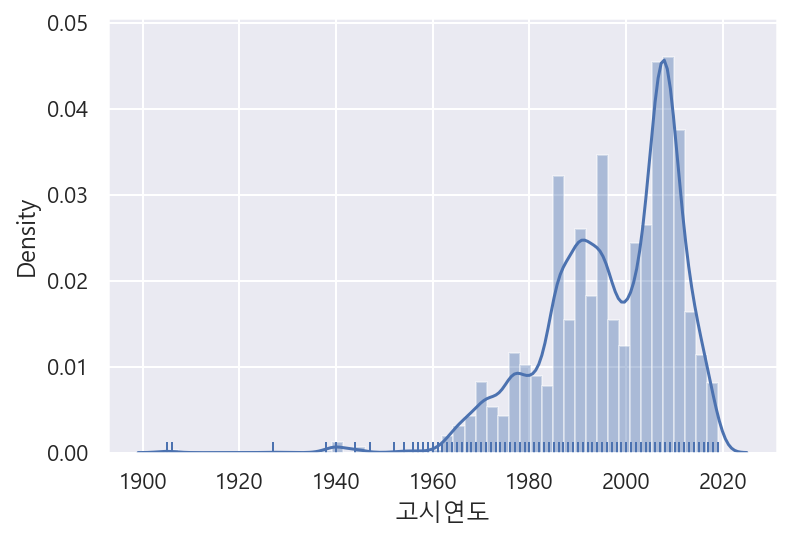

In [36]:
#결측치가 있으면 데이터 타입이 flot이라 notnull인 값만 가져온다 이러면 int값이다.
sns.distplot(df.loc[df["고시연도"].notnull(),"고시연도"],rug=True)

In [37]:
#연도와 월별 고시 현황을 pivot_table로 그려봅니다.
#year_month라는 변수에 담아 재사용 합니다.
#데이터가 많기 때문에 2000년보다 크고 2019년보다 자근 연도의 데이터만 봅니다.
year_month = pd.pivot_table(df, index="고시연도", columns = "고시월", values="공원명", aggfunc = "count" ) #옵션 볼꺼면 shift + tap 키
year_month = year_month[(year_month.index > 2000) & (year_month.index <2019)]
year_month.style.background_gradient() #heatmap 말고 Pandas의 background를 이용하였음.

고시월,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
고시연도,,,,,,,,,,,,
2001.0,48.000000,12.000000,7.000000,42.000000,21.000000,16.000000,6.000000,16.000000,30.000000,36.000000,37.000000,40.000000
2002.0,38.000000,19.000000,18.000000,10.000000,18.000000,14.000000,49.000000,17.000000,7.000000,7.000000,59.000000,55.000000
2003.0,21.000000,13.000000,17.000000,19.000000,10.000000,23.000000,4.000000,8.000000,7.000000,18.000000,48.000000,38.000000
2004.0,48.000000,18.000000,16.000000,18.000000,13.000000,24.000000,7.000000,48.000000,10.000000,24.000000,59.000000,135.000000
2005.0,55.000000,32.000000,18.000000,23.000000,43.000000,33.000000,16.000000,62.000000,18.000000,34.000000,60.000000,105.000000
2006.0,84.000000,34.000000,69.000000,31.000000,54.000000,32.000000,18.000000,33.000000,24.000000,36.000000,119.000000,120.000000
2007.0,69.000000,12.000000,9.000000,42.000000,16.000000,46.000000,62.000000,66.000000,84.000000,164.000000,245.000000,106.000000
2008.0,163.000000,45.000000,77.000000,42.000000,30.000000,102.000000,15.000000,61.000000,32.000000,20.000000,24.000000,126.000000
2009.0,59.000000,31.000000,162.000000,135.000000,57.000000,60.000000,36.000000,23.000000,96.000000,27.000000,73.000000,100.000000


In [38]:
#텍스트 데이터 다루기
#정규표현식
#파이썬에 내장되어있는 라이브러리를 사용.
import re 

In [39]:
#공원 보유 시설 
#컬럼이 너무 많으면 끝까지 보이지 않는다.
#options.display 를 사용해 max_columns 값을 채워줍니다.
pd.options.display.max_columns = 100


In [40]:
df.head(1)

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,시도,구군,고시연도,고시월
0,26440-00001,구랑공원,문화공원,부산광역시 강서구 구랑동 1199-7,부산광역시 강서구 구랑동 1199-7,35.157215,128.854935,9137.0,4,NaN,화장실,NaN,"팔각정자, 파고라2, 평의자6, 앉음벽14.38m, 축구장(골대2), 컨테이너, 안...",2011-09-02,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,부산광역시,강서구,2011.0,9.0


In [41]:
df["공원보유시설(운동시설)"].value_counts(sort=False).head(5)

농구장, 배드민턴장, 족구장, 테니스장, X게임장    4
체력단련시설 없음                      1
철봉,허리돌리기 등                     1
풋살장, 배구장                       1
운동기구, 농구장                      1
Name: 공원보유시설(운동시설), dtype: int64

In [42]:
#운동시설
#"공원보유시설(운동시설)"의 unique 값을 구하고 리스트 형태로 만듭니다.
#그리고 다시 str형태로 변경하고 gym이라는 변수에 담습니다.
gym = df["공원보유시설(운동시설)"].unique().tolist() #리스트 형태로 만들어주기
gym = str(gym) #str형태로 감싸기
gym[:500]

"['4', '7', nan, '8', '5', '6', '3', '10', '14', '9', '30', '2', '13', '12', '40', '17', '-', '농구장', '궁도장', '풋살구장', '풋살구장, 농구장, 인라인스케이트장', '축구장', '족구장', '게이트볼장', '운동기구14개, 농구장2개소, 족구장1개소', '운동기구6개, 족구장1개소', '운동기구10개', '운동기구4개', '운동기구7개', '에어로빅장, 농구장', '테니스장, 씨름장, 농구장', '바디싣업1,스트레칭롤러1,전신돌리기1,허리안마기1,허리비틀기1', 'TM스탭사이클1,TM체어웨이트1,TM트윈바디싣업1,TM트윈트위스트1,TM크로스컨트리1,TM풀웨이트1', '철봉1', '하늘걷기1,마라톤운동1,허리돌리기1,3단철봉,윗몸일으키기1', '철봉1,팔굽혀펴기1,몸통돌리기1,허리좌우로흔들기1', '스트레칭롤러1,풀웨이트1,바웨이트1', '하늘걷기1,온몸허리돌리기1,스트레칭기1,거꾸로매달리기1', '하늘"

In [43]:
#replace 기능을 사용해서 ,를 빈문자로 공백을 , 로 +를 ,로 변경합니다
gym = gym.replace("+", ",").replace("'", ",").replace(" ", ",").replace("/", ",")
gym[:1000]

'[,4,,,,7,,,nan,,,8,,,,5,,,,6,,,,3,,,,10,,,,14,,,,9,,,,30,,,,2,,,,13,,,,12,,,,40,,,,17,,,,-,,,,농구장,,,,궁도장,,,,풋살구장,,,,풋살구장,,농구장,,인라인스케이트장,,,,축구장,,,,족구장,,,,게이트볼장,,,,운동기구14개,,농구장2개소,,족구장1개소,,,,운동기구6개,,족구장1개소,,,,운동기구10개,,,,운동기구4개,,,,운동기구7개,,,,에어로빅장,,농구장,,,,테니스장,,씨름장,,농구장,,,,바디싣업1,스트레칭롤러1,전신돌리기1,허리안마기1,허리비틀기1,,,,TM스탭사이클1,TM체어웨이트1,TM트윈바디싣업1,TM트윈트위스트1,TM크로스컨트리1,TM풀웨이트1,,,,철봉1,,,,하늘걷기1,마라톤운동1,허리돌리기1,3단철봉,윗몸일으키기1,,,,철봉1,팔굽혀펴기1,몸통돌리기1,허리좌우로흔들기1,,,,스트레칭롤러1,풀웨이트1,바웨이트1,,,,하늘걷기1,온몸허리돌리기1,스트레칭기1,거꾸로매달리기1,,,,하늘걷기1,온몸허리돌리기1,등허리지압기1,철봉3,,,,스탭싸이클1,풀웨이트1,트리플트위스트2,트윈바디싣업1,크로스컨트리1,스트레칭롤러1,트윈워밍암1,,,,하늘걷기2,스탭싸이클1,체어폴1,철봉1,트리플트위스트2,트윈바디싣업1,,,,윗몸일으키기1,온몸허리돌리기1,팔굽혀펴기1,다리뻗치기1,온몸허리돌리기1,거꾸로매달리기1,,,,하늘걷기1,온몸허리돌리기1,옆파도타기1,,,,크로스워킹,스카이워킹1,파워프레스,풀웨이트1,싸이클론,트위스트1,스탠드업,마사지롤1,사이드스윙,터닝암1,푸시웨이트,레그프레스1,,,,평행봉1,,,,트윈바디싣업1,트윈트위스트1,스탭싸이클1,크로스컨트리1,체어풀1,,,,크로스컨트리1,자전거팔뻗기2,등안마기1,트윈워밍암1,체어웨이트1,오버턴스트레칭1,,,,크로스컨트리1,롤링웨이스트1,레그프레스1,트윈트위스트1,체어웨이트1,,,,족구장1,역기1,,,,등지압기1,마라톤운동,공중걷기운동1,허리돌리기,온몸돌리기1,,온몸역기올리기,온몸근육풀기1,,,,트리플트위스트1,트윈바디싣업1,크로스컨

In [44]:
#제거할 특수문자를 빈문자로 대체합니다
gym = re.sub("[\[\d\-nan\.\]]","" ,gym) #문자뒤에 붙어 있는 숫자 제거하기
gym = re.sub(",{2,}",",",gym)
gym[:1000]

',농구장,궁도장,풋살구장,풋살구장,농구장,인라인스케이트장,축구장,족구장,게이트볼장,운동기구개,농구장개소,족구장개소,운동기구개,족구장개소,운동기구개,운동기구개,운동기구개,에어로빅장,농구장,테니스장,씨름장,농구장,바디싣업,스트레칭롤러,전신돌리기,허리안마기,허리비틀기,TM스탭사이클,TM체어웨이트,TM트윈바디싣업,TM트윈트위스트,TM크로스컨트리,TM풀웨이트,철봉,하늘걷기,마라톤운동,허리돌리기,단철봉,윗몸일으키기,철봉,팔굽혀펴기,몸통돌리기,허리좌우로흔들기,스트레칭롤러,풀웨이트,바웨이트,하늘걷기,온몸허리돌리기,스트레칭기,거꾸로매달리기,하늘걷기,온몸허리돌리기,등허리지압기,철봉,스탭싸이클,풀웨이트,트리플트위스트,트윈바디싣업,크로스컨트리,스트레칭롤러,트윈워밍암,하늘걷기,스탭싸이클,체어폴,철봉,트리플트위스트,트윈바디싣업,윗몸일으키기,온몸허리돌리기,팔굽혀펴기,다리뻗치기,온몸허리돌리기,거꾸로매달리기,하늘걷기,온몸허리돌리기,옆파도타기,크로스워킹,스카이워킹,파워프레스,풀웨이트,싸이클론,트위스트,스탠드업,마사지롤,사이드스윙,터닝암,푸시웨이트,레그프레스,평행봉,트윈바디싣업,트윈트위스트,스탭싸이클,크로스컨트리,체어풀,크로스컨트리,자전거팔뻗기,등안마기,트윈워밍암,체어웨이트,오버턴스트레칭,크로스컨트리,롤링웨이스트,레그프레스,트윈트위스트,체어웨이트,족구장,역기,등지압기,마라톤운동,공중걷기운동,허리돌리기,온몸돌리기,온몸역기올리기,온몸근육풀기,트리플트위스트,트윈바디싣업,크로스컨트리,체어웨이트,롤링웨이스트,레그프레스,오버턴스트레칭,윗몸일으키기,트리플트위스트,평행봉,크로스컨트리,레그프레스,체어웨이트,롤링웨이스트,트윈바디싣업,레그스트레칭,크로스컨트리,어깨근육풀기,체어웨이트,트윈바디싣업(구형),트리플트위스트(구형),게이트볼장,운동시설,축구장,족구장,족구장,운동기구,운동기구,축구장,배드민턴장,농구장,배드민턴장,족구장,농구대,배드민턴장,배드민턴장,농구대,농구장,개소,배드민턴장,게이트볼장,개소,체력단련시설,개소,기,등,배드민턴장,개소,체력단련시설,개소,개,배드민턴장,개소,농구장,개소,체력단련시설,개소,개,다목

In [45]:
# split을 사용해 문자열을 ,로 리스트형태로 만든 후에
# 판다스의 시리즈 형태로 데이터를 만들면 빈도수를 구할 수 있습니다.
# 빈도수는 gym_count 라는 변수에 담습니다.
gym_count = pd.Series(gym.split(",")).value_counts()
gym_count.head()

배드민턴장     221
농구장       216
운동기구      185
게이트볼장     156
체력단련시설    148
dtype: int64

<AxesSubplot:>

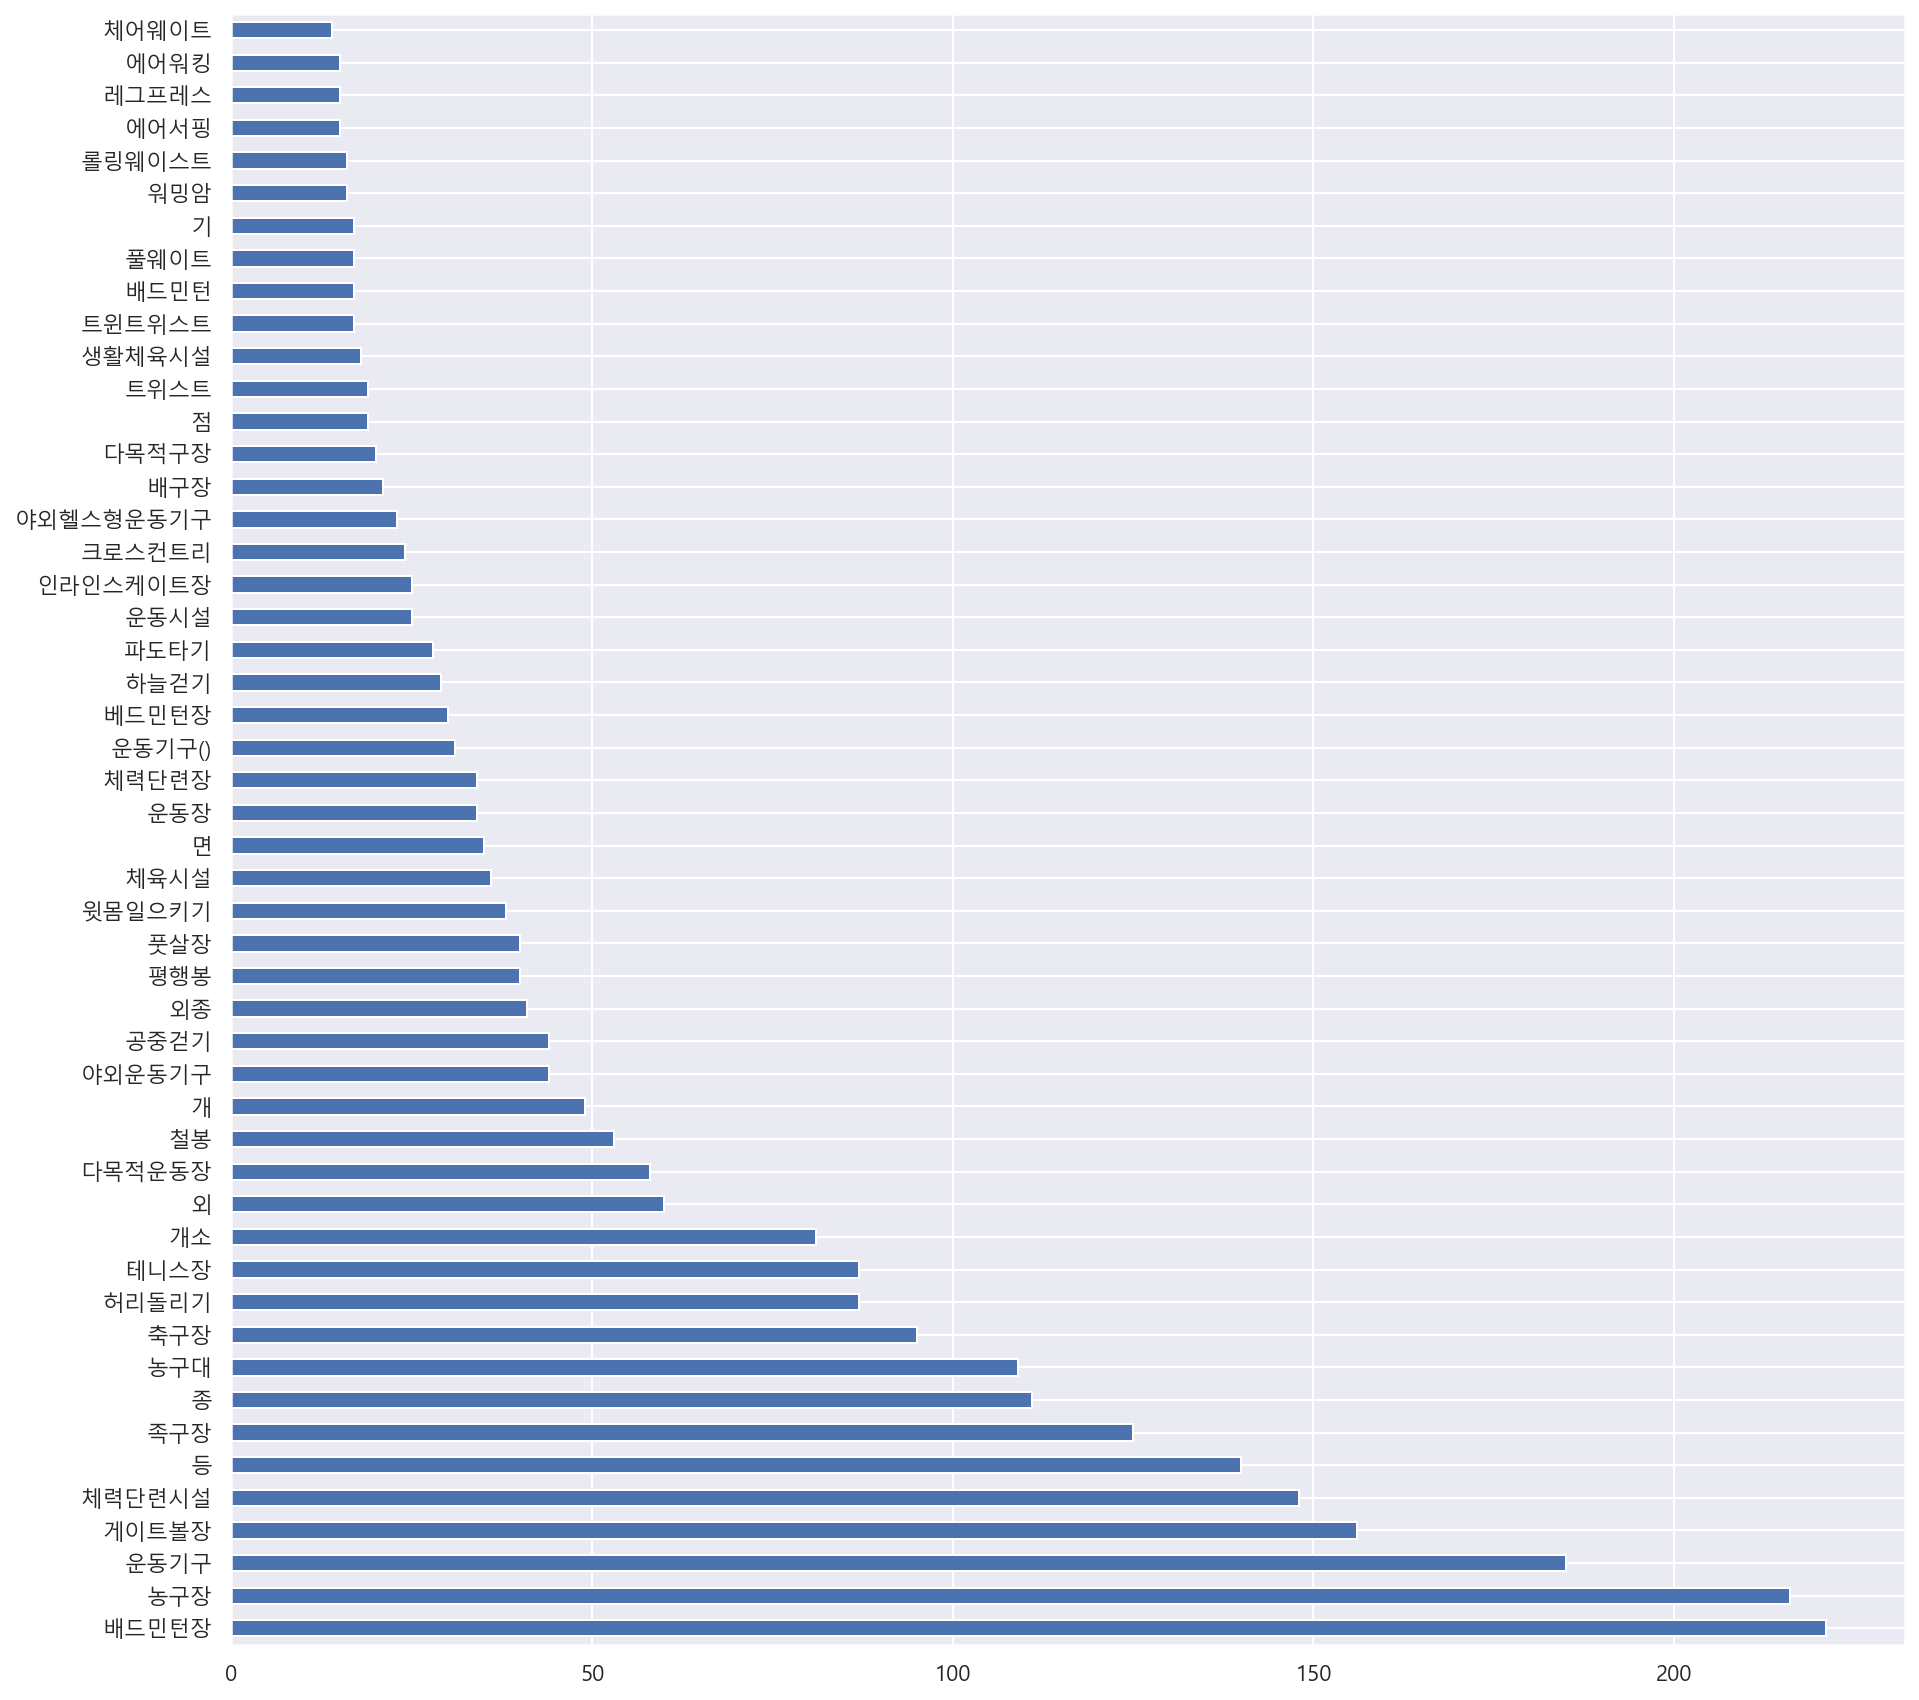

In [46]:
#빈도수를 구한 gym_count 변수에서 head를 통해 상위 50개 단어에 대한 그래프를 그립니다.
gym_count.head(50).plot.barh(figsize=(15,15))

In [47]:
#워드 클라우드로 빈도수 표현해보기
#함수 만들기
#WordCloud 단어의 크기로 빈도수를 대략적으로 확인할수 있게 한것.

from wordcloud import WordCloud

def Wordcloud(data, width = 1200, height = 500):
    word_draw = WordCloud(
        font_path = r"C:\Windows\Malgun.ttf", #내가 임의로 새로 폰트 파일 복사해서 만들어줬음, 원래 fonts경로에서 안되어서
        width = 1200, height = 500, 
        stopwords=["운동기구","개소","외종"],       #내가 빼고자하는거
        background_color = "white",
        random_state=42
    )
    word_draw.generate(data)

    plt.figure(figsize=(15,5))
    plt.imshow(word_draw)
    plt.axis("off")
    plt.show()

<ipython-input-47-b45b48b4f3ae>:20: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


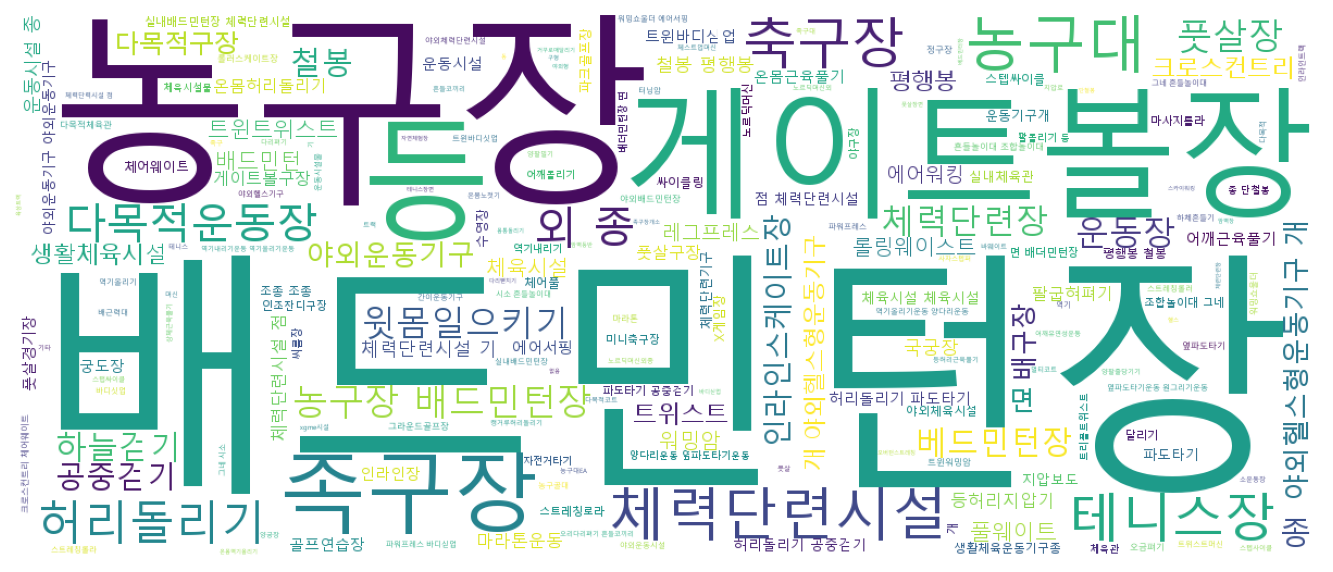

In [48]:
#위에서 만든 함수에 전처리한 text인 gym을 넣어 그려봅니다.
Wordcloud(gym) #그릴 떄 마다 다른 모습의 wordcloud로 그리는데 이것을 계속 똑같은 것으로 표현하고 싶으면, 위에 함수를 만들어주는 부분에서 random_state를 설정해준다.

In [49]:
#편의시설
#편익시설에서 필요 없는 문자를 제거하고
#토큰화를 위해 각 시설을 "," 로 구분하도록 전처리를 하는 함수를 구현합니다.
#함수명은 get_string으로 합니다

def get_string(text):
    if pd.isna(text):
        return text
    
    text = re.sub("[\d\.'\-(nan)\[\]\/]","",text) #  \d: 숫자를 제거 , []대괄호로 묶어주면 안에 있는 것들은 다 없에준다.
    text = re.sub(" ","", text)
    text = re.sub(",{2,}", ",", text) # ,컴마 값이 2개이상 나와 보기 않좋을때는 지우기 위해서는 ",{2,}" 이렇게 표현해주어야 한다.
    return text

In [50]:
#함수가 잘 구현되었는지 확인해 봅니다.
#다음의 문자를 전처리 했을 때 

get_string("[1. '화장실' 5, 2. 주차장, -, nan, / ]")

'화장실,주차장,'

In [51]:
#결측치를 넣어봅니다. 오류 확인해보기
get_string(np.nan)

nan

In [52]:
#map을 통해 위에서 구현한 함수를 적용해 줍니다.
# 원본과 비교해 보기 위해 "편익시설"이라는 새로운 컬럼을 만듭니다.

df["편익시설"] = df["공원보유시설(편익시설)"].map(get_string)
df["편익시설"].head()

0    화장실
1    NaN
2    NaN
3    NaN
4    NaN
Name: 편익시설, dtype: object

In [53]:
df["편익시설"].value_counts().tail()

파고라,벤치,테이블,음수대                  1
벤치,야외탁자                         1
파고라,정자,벤치,분수,경관조명,나무데크다리,막구조    1
주차장,전망대,화장실,등의자,평상등             1
음수장외종                           1
Name: 편익시설, dtype: int64

In [54]:
type(np.nan)

float

In [55]:
#문자열을 연결해 주는 join 으로 편익시설을 연결해 주는 방법이 있습니다.
#이 때, 결측치가 있으면 결측치는 숫자형태이기 때문에 문자와 연결되지 않아 오류가 납니다.
#따라서 결측치를 제외한 값만 가져와서 연결합니다.
fac = ",".join(df.loc[df["편익시설"].notnull(), "편익시설"])
fac = get_string(fac)
fac[:100]

'화장실,화장실,화장실,주차장,관리사무소,화장실,화장실,화장실,주차장,화장실,주차장,화장실,주차장,문화회관,화장실,화장실,화장실,음수전,음수전,주차장,주차장,화장실,화장실,주차장,화'

In [56]:
fac = str(df["편익시설"].tolist())
fac = get_string(fac)
#전처리 방법 2가지 (1)join을 이용, (2)tolist()를 이용


In [57]:
re.sub(",{2,}", "," , '화장실,주차장,,,')

'화장실,주차장,'

In [58]:
fac_count = pd.Series(fac.split(",")).value_counts()
fac_count.head()

화장실    1921
파고라     817
벤치      650
정자      535
주차장     502
dtype: int64

<AxesSubplot:>

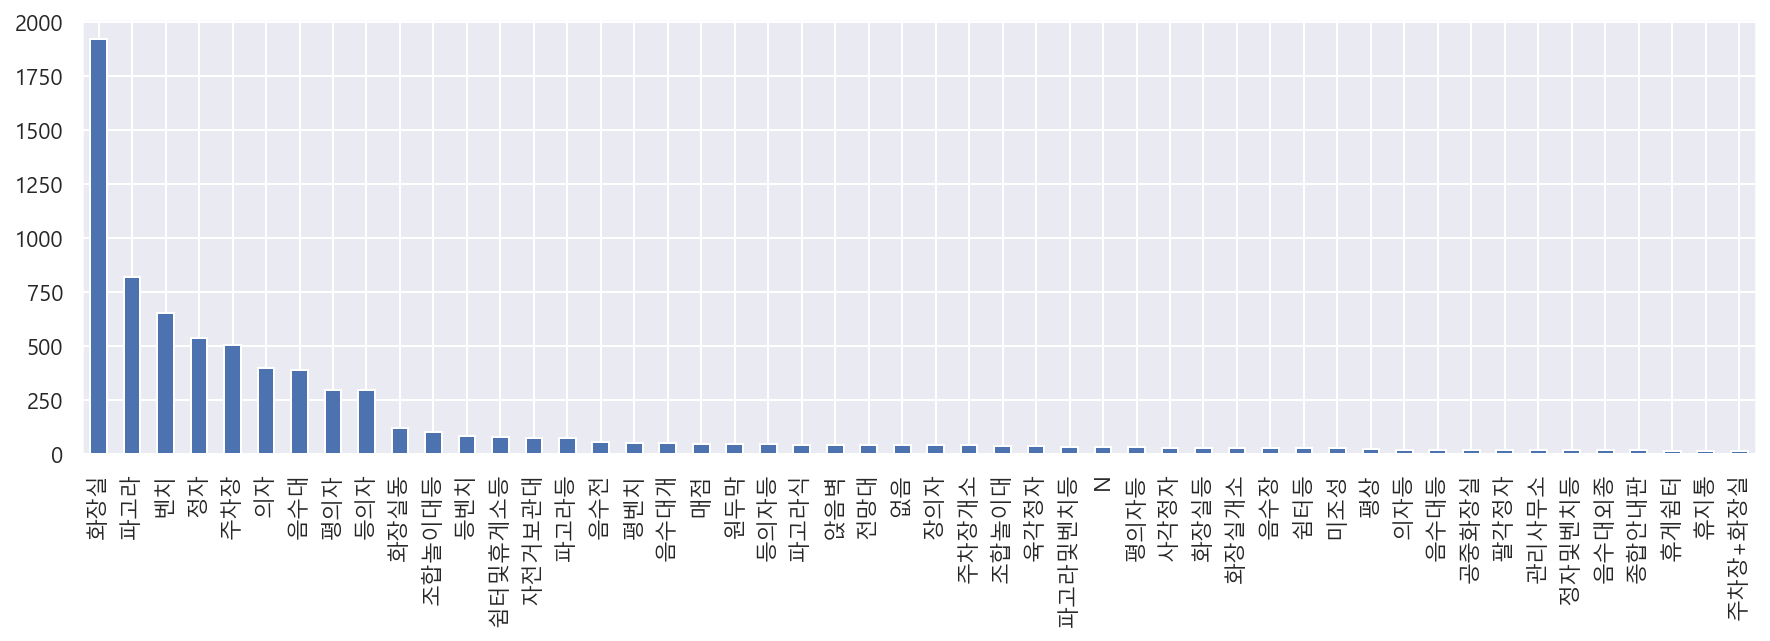

In [59]:
fac_count.head(50).plot.bar(figsize=(15,4))

<ipython-input-47-b45b48b4f3ae>:20: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


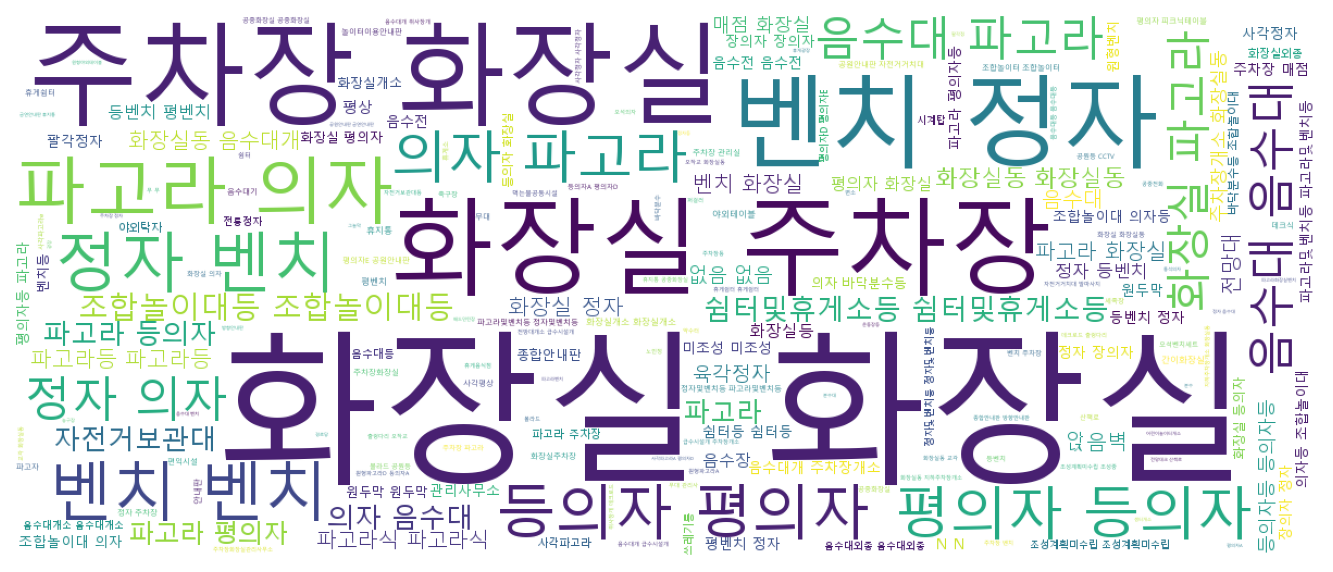

In [60]:
Wordcloud(fac) 

In [61]:
#키워드 별 빈도수 구하기
#중복이 되는 키워드가 많이 있음, 예) 화장실, 화장실동, 공중화장실
#일일이 전처리를 해주면 좋지만 데이터 전처리에는 많은 예외가 등장합니다.
#그래서 때로는 보고자 하는 키워드를 넣고 빈도수를 구하는게 전처리를 하는 작업보다 빠를 때도 있습니다.
#여기에서는 운동시설이나 편의시설이 있는데 특정 시설을 키워드에 넣고 구하는 방법을 사용해 봅니다.

# "공원보유시설(편익시설)" 에서 문자열 처리를 하기 위해 결측치를 제외한 값을 가져옵니다.
# df_fac 이라는 변수에 담습니다.

facilities = {"화장실","주차장","음수대","파고라","정자",
              "벤치","의자","놀이터","축구장","야영장","CCTV"}

In [62]:
df_fac = df[df["공원보유시설(편익시설)"].notnull()]

In [63]:
# facilities 리스트에 있는 값으로 for문을 활용해 컬럼을 만듭니다.
# 해당 단어가 들어가면 True, 아니면 False로 값이 표현되도록 합니다.
for f in facilities:
    df[f] = df_fac["공원보유시설(편익시설)"].str.contains(f)
    print(df[f])

0        True
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
18132     NaN
18133    True
18134     NaN
18135     NaN
18136    True
Name: 화장실, Length: 18137, dtype: object
0        False
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
18132      NaN
18133    False
18134      NaN
18135      NaN
18136    False
Name: CCTV, Length: 18137, dtype: object
0        False
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
18132      NaN
18133    False
18134      NaN
18135      NaN
18136    False
Name: 축구장, Length: 18137, dtype: object
0        False
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
18132      NaN
18133    False
18134      NaN
18135      NaN
18136    False
Name: 음수대, Length: 18137, dtype: object
0        False
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
18132      NaN
18133    False
18134      NaN
18135      NaN
18136    False
Name: 정자, Length: 18137, 

In [64]:
#facilities 리스트로 만든 각 컬럼의 빈도수를 구합니다.
df[facilities].sum()

화장실     2208
CCTV       6
축구장        6
음수대      493
정자       648
주차장      611
의자       949
벤치       850
야영장        3
놀이터       21
파고라     1032
dtype: object

In [65]:
#특정 정보 마스킹
#전화번호 마스킹
#가운데가 4자리일 떄 번호 마스킹 "010-1234-5678"
#re.sub("규칙","패턴","데이터")
#규칙
#(\d{3} 는 숫자 3자리를 의미합니다.
#(\d{1,2})는 숫자 1~2자리를 의미합니다.
#패턴 
#re.sub("규칙","패턴","데이터")
#r은 raw를 의미합니다.

re.sub("(\d{3})-(\d{2})(\d{2})-(\d{2})(\d{2})",r"\1-\2**-**\5","010-1234-5678")

'010-12**-**78'

In [66]:
# 가운데가 3자리일 때 번호 마스킹이 잘 동작하는지 확인
re.sub("(\d{3})-(\d{1,2})(\d{2})-(\d{2})(\d{2})",r"\1-\2**-**\5","010-1230-5678")

'010-12**-**78'

In [67]:
#가운데가 2자리일 떄는 마스킹 없이 보이는 확인하기 
re.sub("(\d{3})-(\d{2})(\d{2})-(\d{2})(\d{2})",r"\1-\2**-**\5","010-12-5678")

'010-12-5678'

In [68]:
#국가 번호가 들어갈 떄 확인하기 
# - 가 들어가거나 여러 예외상항이 있을 때 마스킹 되지 않을 수 있음 그렇다면 함수를 만들어서 해결해 보기
re.sub("(\d{3})-(\d{2})(\d{2})-(\d{2})(\d{2})",r"\1-\2**-**\5","+82-10-1234-5678")

'+82-10-1234-5678'

In [69]:
#함수를 통해 가운데 들어오는 번호를 마스킹 하도록 처리
#국제 번호 등 다양한 형식의 번호가 들어왔을 떄
# -를 기준으로 뒤에서 두 번째 항목을 마스킹 처리 하되,
#마지막 자리는 앞 두자리만 마스킹 합니다

phone = "82-10-1234-5678"

def mask_phone_number(phone):
    
    if pd.isnull(phone):
        return phone
    
    num = phone.split("-")
    num_len = len(num) // 2
    
    num[num_len] = re.sub("\w", "*", num[num_len])
    num[-1] = re.sub("(\d{2})(\d{2})", r"**\2", num[-1])
    
    return "-".join(num)

mask_phone_number(phone)

'82-10-****-**78'

In [70]:
mask_phone_number(np.nan)

nan

In [71]:
df["전화번호(전처리)"] = df["전화번호"].map(mask_phone_number)
df[["공원명","전화번호","전화번호(전처리)"]].head()

,공원명,전화번호,전화번호(전처리)
0,구랑공원,051-970-4536,051-***-**36
1,압곡공원,051-970-4536,051-***-**36
2,서연정공원,051-970-4536,051-***-**36
3,용두공원,051-970-4536,051-***-**36
4,새동내공원,051-970-4536,051-***-**36


In [72]:
#이메일 주소 마스킹 해보기
#해당 데이터에는 이메일 주소가 없지만 정규표현식을 더 연습해 보기 위해 이메일주소도 마스킹 처리를 해봅니다.
# 이메일 주소의 형식만 남기고 모두 마스크처리 합니다.

email = "address@mail.com"

re.sub("[^@.]", "x", email)

'xxxxxxx@xxxx.xxx'

In [73]:
# 이메일 주소 아이디의 일부만 마스키처리 합니다
email = "address@mail.com"

address, domain = email.split("@")
mask = re.sub("\w","*",address[1:-1])
print(f"{address[0]}{mask}{address[-1]}@{domain}")
print(email)

a*****s@mail.com
address@mail.com


In [74]:
#함수를 만들어보기

def mask_email(email):
    address, domain = email.split("@")
    mask = re.sub("\w","*",address[1:-1])
    return (f"{address[0]}{mask}{address[-1]}@{domain}")

mask_email(email)

'a*****s@mail.com'

In [75]:
mask_email("toyou4203@naver.com")

't*******3@naver.com'

In [76]:
#데이터 요약하기
#수치형, 범주형 변수 구분하기
#data_types 변수에 데이터 타입만 따로 모으기

data_types = df.dtypes
data_types[:10]

관리번호             object
공원명              object
공원구분             object
소재지도로명주소         object
소재지지번주소          object
위도              float64
경도              float64
공원면적            float64
공원보유시설(운동시설)     object
공원보유시설(유희시설)     object
dtype: object

In [77]:
#수치형 변수 요약
#수치형 변수 구하기
#var_numbers 변수에 담습니다.
var_numbers = data_types[data_types != "object"]
var_numbers = var_numbers.index.tolist()
var_numbers

['위도', '경도', '공원면적', '지정고시일', '고시연도', '고시월']

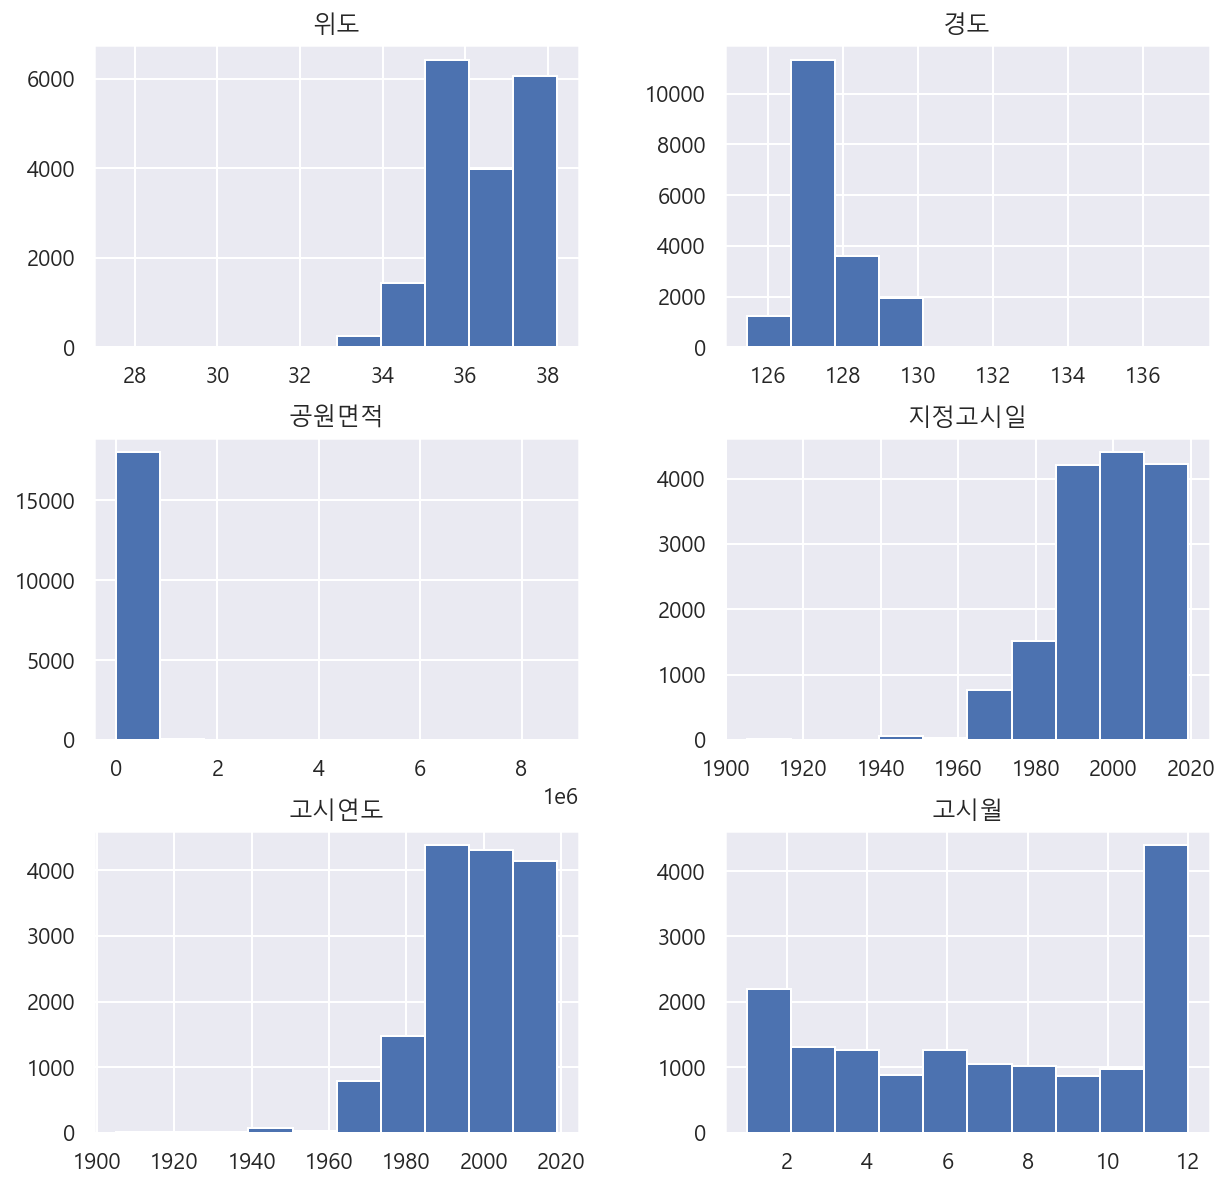

In [78]:
#히스토그램을 그리면 수치형 변수 에 대한 분포를 확인할 수 있습니다.
#빈도수 분포 => 도수 분포표를 시각화 합니다.
h = df.hist(figsize=(10,10))

In [79]:
# describe를 통해 요약합니다.

df.describe()


,위도,경도,공원면적,고시연도,고시월
count,18137.000000,18137.000000,1.813700e+04,15225.000000,15225.000000
mean,36.335922,127.543937,3.781196e+04,1997.238555,7.097274
std,1.051835,0.892670,2.203052e+05,13.592078,3.753724
min,27.551606,125.430955,0.000000e+00,1905.000000,1.000000
25%,35.275430,126.872301,1.503000e+03,1989.000000,4.000000
50%,36.364729,127.130926,2.159000e+03,2000.000000,7.000000
75%,37.404278,128.466193,1.025460e+04,2008.000000,11.000000
max,38.224926,137.202661,8.703000e+06,2019.000000,12.000000


In [80]:
#범주형 변수 구하기

var_objects = data_types[data_types == "object"]
var_objects = var_objects.index.tolist()
var_objects[:5]


['관리번호', '공원명', '공원구분', '소재지도로명주소', '소재지지번주소']

In [81]:
#문자열 타입의 데이터 describe()로 요약하기
df[var_objects].describe()\
#다른 방법
#df.describe(include = "object")

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,시도,구군,편익시설,화장실,CCTV,축구장,음수대,정자,주차장,의자,벤치,야영장,놀이터,파고라,전화번호(전처리)
count,18137,18137,18137,18137,17158,4845,6964,5084,1160,3116,17383,16957,18137,18137,18137,18137,18137,5084,5084,5084,5084,5084,5084,5084,5084,5084,5084,5084,5084,16957
unique,14710,12423,10,15186,14419,1485,1237,1102,378,993,279,497,112,219,219,17,232,730,2,2,2,2,2,2,2,2,2,2,2,395
top,31110-60001,공원,어린이공원,전라남도 무안군 삼향읍 남악리 미지정 간척지,전라남도 무안군 삼향읍 남악리 미지정 간척지,운동기구,조합놀이대,화장실,-,-,경상남도 창원시청,055-212-4501,2019-09-24,5670000,경상남도 창원시,경기도,창원시,화장실,False,False,False,False,False,False,False,False,False,False,False,055-***-**01
freq,124,145,9987,18,18,360,1526,1037,250,141,1176,344,1344,1176,1176,3318,1176,1086,2876,5078,5078,4591,4436,4473,4135,4234,5081,5063,4052,696


In [82]:
#수치형 데이터는 pivot table로 , 범주형 데이터는 crosstab으로 
#crosstab
#범주형 변수끼리의 빈도수 구하기
manage_category = pd.crosstab(index = df["관리기관명"], columns = df["공원구분"])
manage_category[manage_category["체육공원"] > 5].style.background_gradient()

공원구분,근린공원,기타,도시농업공원,묘지공원,문화공원,소공원,수변공원,어린이공원,역사공원,체육공원
관리기관명,,,,,,,,,,
경기도 김포시 체육과,0,0,0,0,0,0,0,0,0,7
경기도 남양주시청,33,0,0,2,5,25,4,68,4,6
경기도 시흥시청,37,0,1,0,7,6,3,72,0,6
경상남도 창원시청,224,0,0,8,8,100,0,816,0,20
대전광역시 대덕구청,11,1,0,0,3,8,0,50,1,6
성남시 공원과,50,0,0,1,0,0,0,0,2,6
전라남도 장성군청,14,0,0,0,4,118,2,10,2,6


In [83]:
#시도 별 공원 구분

city_category =  pd.crosstab(index = df["시도"], columns = df["공원구분"]) 
city_category.style.background_gradient() #경기도에 공원이 많다라는것을 볼 수 있음.


공원구분,근린공원,기타,도시농업공원,묘지공원,문화공원,소공원,수변공원,어린이공원,역사공원,체육공원
시도,,,,,,,,,,
강원도,141,0,2,1,8,85,10,391,4,6
경기도,806,17,1,8,91,406,61,1821,34,73
경상남도,390,0,3,8,25,178,17,1161,12,31
경상북도,178,3,0,0,18,100,26,575,11,6
광주광역시,97,0,0,0,0,18,5,305,1,3
대구광역시,125,0,0,0,5,57,6,381,2,10
대전광역시,99,1,0,1,12,47,12,315,1,9
부산광역시,144,16,1,2,14,96,9,365,3,3
서울특별시,332,70,4,1,19,183,4,1117,11,4


In [84]:
city_count = df['시도'].value_counts().to_frame()
city_mean = df['시도'].value_counts(normalize=True).to_frame() #각 시도의 비율을 구할수 있음 normalize=True
city_count.head()


,시도
경기도,3318
전라남도,1882
경상남도,1825
서울특별시,1745
충청남도,1723


In [85]:
city = city_count.merge(city_mean, left_index=True, right_index = True)
city.columns = ["합계","비율"]
city.style.background_gradient()

,합계,비율
경기도,3318,0.182941
전라남도,1882,0.103766
경상남도,1825,0.100623
서울특별시,1745,0.096212
충청남도,1723,0.094999
전라북도,1137,0.062690
경상북도,917,0.050560
충청북도,899,0.049567
울산광역시,887,0.048906
인천광역시,675,0.037217


<AxesSubplot:xlabel='경도', ylabel='위도'>

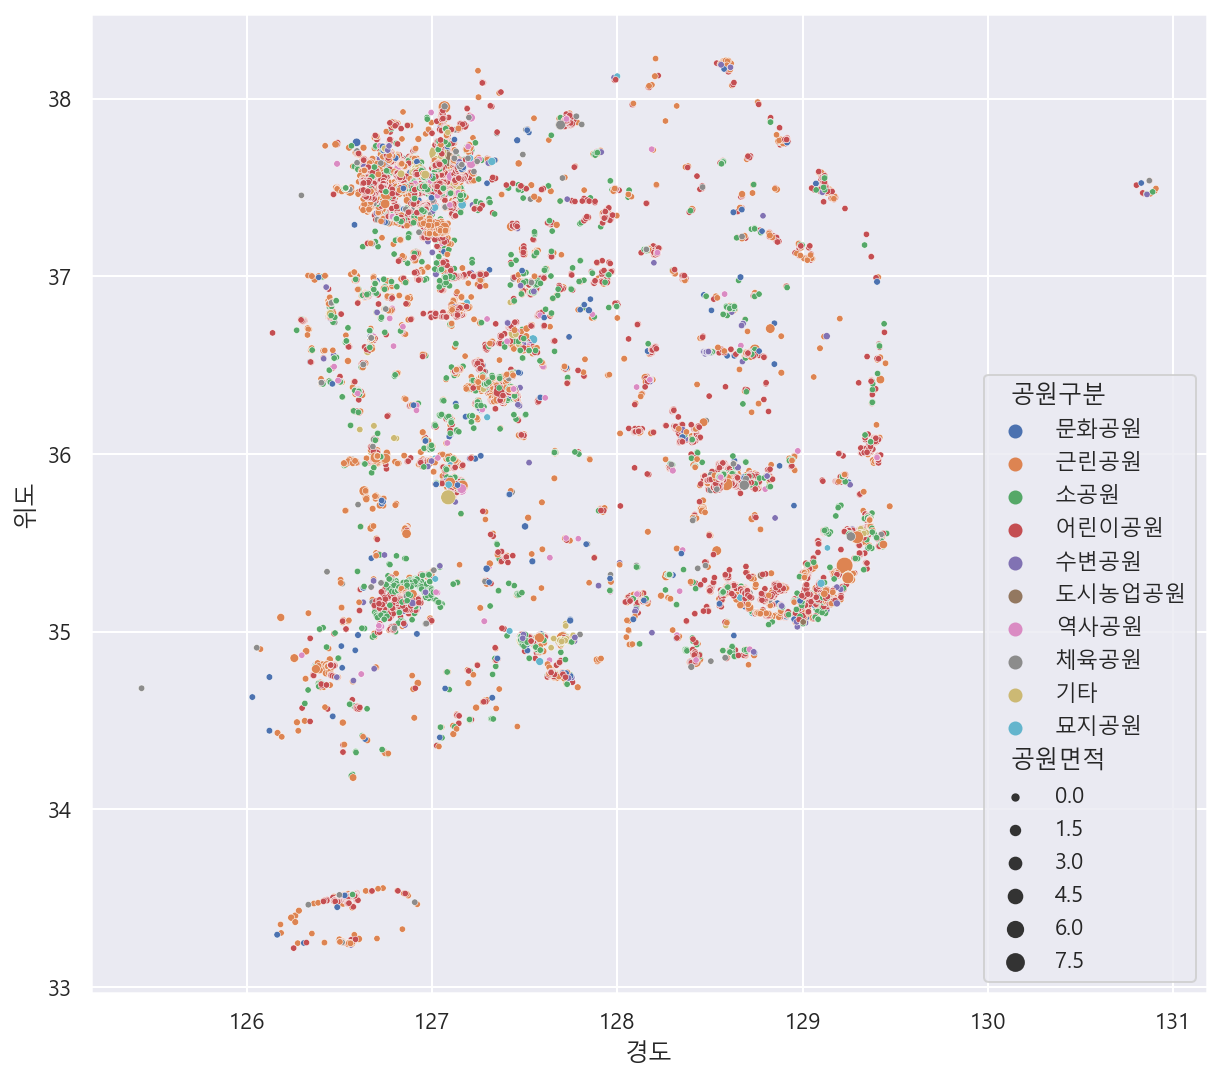

In [86]:
#공원 분포 그리기
plt.figure(figsize=(10,9))
sns.scatterplot(data=df_park, x="경도",y="위도",hue="공원구분", size="공원면적",sizes=(10,80))

<AxesSubplot:xlabel='경도', ylabel='위도'>

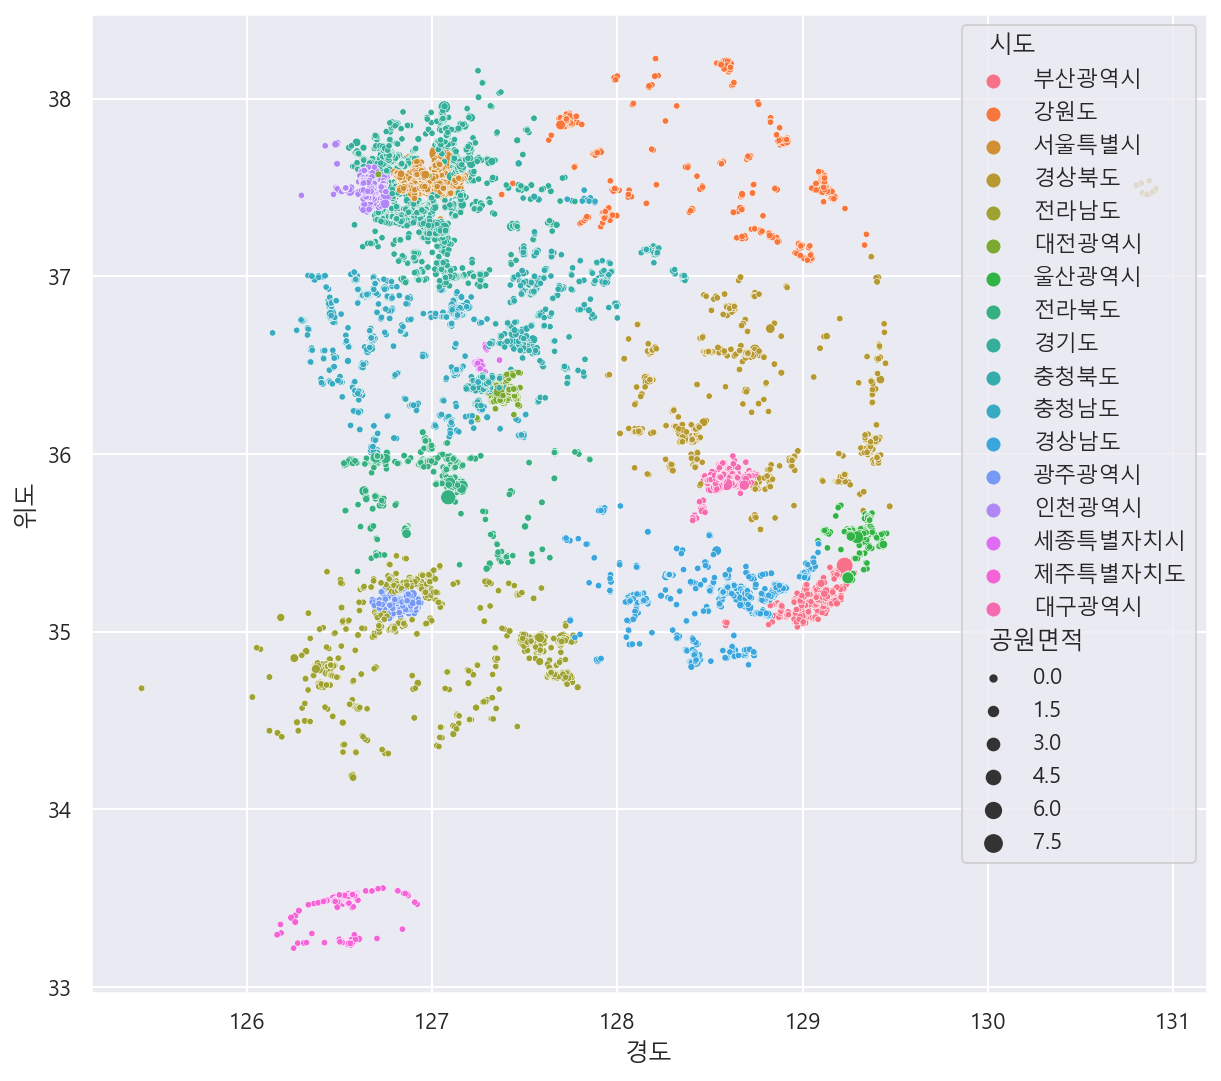

In [87]:
#공원 분포 그리기
plt.figure(figsize=(10,9))
sns.scatterplot(data=df_park, x="경도",y="위도",hue="시도", size="공원면적",sizes=(10,80))

In [88]:
city_count.index

Index(['경기도', '전라남도', '경상남도', '서울특별시', '충청남도', '전라북도', '경상북도', '충청북도', '울산광역시',
       '인천광역시', '부산광역시', '강원도', '대구광역시', '대전광역시', '광주광역시', '제주특별자치도',
       '세종특별자치시'],
      dtype='object')

<AxesSubplot:xlabel='count', ylabel='시도'>

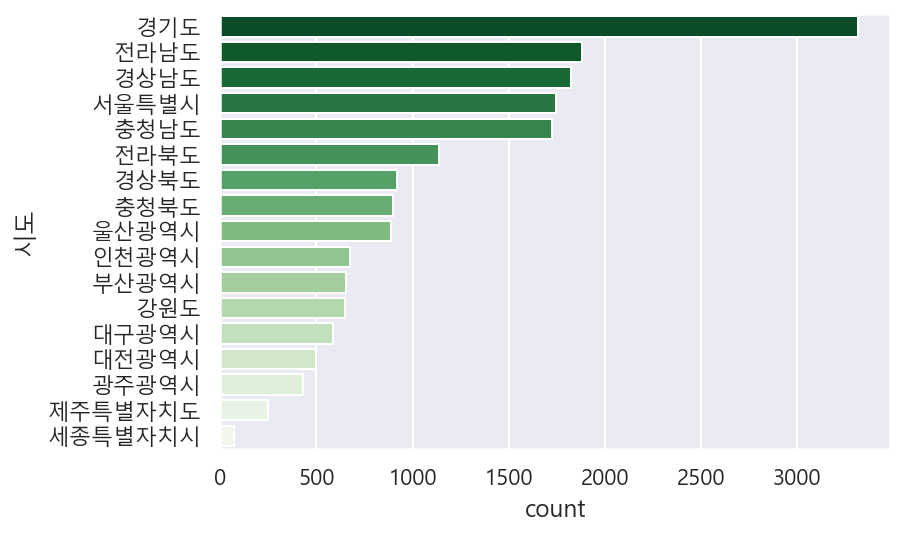

In [89]:
#countplot으로 시도별 빈도수를 그립니다.
sns.countplot(data=df, y="시도", order = city_count.index, palette = "Greens_r")

In [90]:
#특정 공원구분 가져오기
df["공원구분"].value_counts()

어린이공원     9987
근린공원      4170
소공원       2647
문화공원       322
수변공원       301
기타         260
체육공원       230
역사공원       164
묘지공원        43
도시농업공원      13
Name: 공원구분, dtype: int64

In [91]:
park_type = r'.*((역사|체육|수변|문화)공원).*' 
park = df[df["공원구분"].str.match(park_type)]
park.shape

(1017, 36)

In [92]:
#위에서 정의한 var_numbers가져오기
var_numbers

['위도', '경도', '공원면적', '지정고시일', '고시연도', '고시월']

In [93]:
var_pair = var_numbers
var_pair.append("공원구분") #리스트에서 추가는 append, 삭제는 remove
var_pair

['위도', '경도', '공원면적', '지정고시일', '고시연도', '고시월', '공원구분']

In [94]:
var_pair.remove("지정고시일")
var_pair.remove("고시연도")
var_pair.remove("고시월")
var_pair


['위도', '경도', '공원면적', '공원구분']

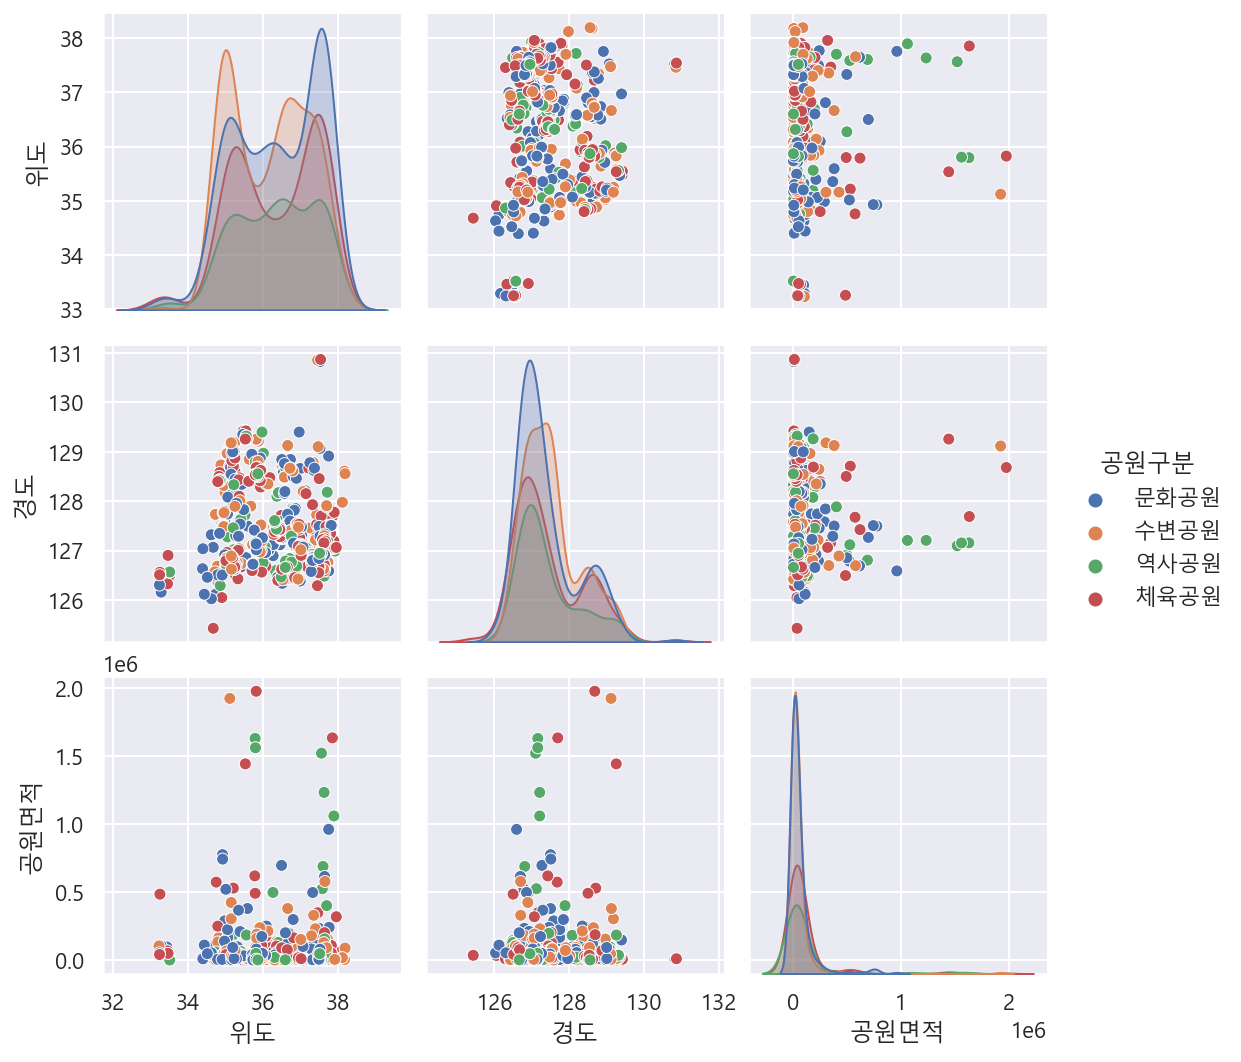

In [95]:
sns.pairplot(park[var_pair], hue="공원구분")

In [102]:
#피봇테이블로 시도별 공원수와 평균면적구하기
park_size = pd.pivot_table(df, index="시도", values="공원면적", aggfunc=["count","mean","median"])
park_size.style.background_gradient()

,count,mean,median
,공원면적,공원면적,공원면적
시도,,,
강원도,648,29539.004630,1886.500000
경기도,3318,27628.744093,2527.900000
경상남도,1825,51390.226795,2163.000000
경상북도,917,29771.096947,2146.000000
광주광역시,429,20571.033333,2192.000000
대구광역시,586,28622.956143,2044.150000
대전광역시,497,36507.091952,2069.100000
부산광역시,653,54162.930521,2158.000000


In [114]:
#내가 사는 지역의 공원을 지도에 표시해 보기
df_sn = df[df["시도"]=="대전광역시"]
df_sn.shape

(497, 36)

In [116]:
df_sn[["시도","구군","공원명"]].head()

,시도,구군,공원명
778,대전광역시,유성구,덕명
779,대전광역시,유성구,대전노은2(지울)
780,대전광역시,유성구,문지
781,대전광역시,유성구,강변
782,대전광역시,유성구,추목천


In [144]:
park

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,시도,구군,고시연도,고시월,편익시설,화장실,CCTV,축구장,음수대,정자,주차장,의자,벤치,야영장,놀이터,파고라,전화번호(전처리)
0,26440-00001,구랑공원,문화공원,부산광역시 강서구 구랑동 1199-7,부산광역시 강서구 구랑동 1199-7,35.157215,128.854935,9137.0,4,NaN,화장실,NaN,"팔각정자, 파고라2, 평의자6, 앉음벽14.38m, 축구장(골대2), 컨테이너, 안...",2011-09-02,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,부산광역시,강서구,2011.0,9.0,화장실,True,False,False,False,False,False,False,False,False,False,False,051-***-**36
23,26440-00024,철새탐방공원,문화공원,부산광역시 강서구 명지오션시티1로 284 (명지동),부산광역시 강서구 명지동 3308-3,35.084080,128.911810,1344.0,NaN,NaN,NaN,NaN,"이층정자1, 철새탐조대1, 등의자2",2008-11-12,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,부산광역시,강서구,2008.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,051-***-**36
26,26440-00027,남강공원,문화공원,부산광역시 강서구 미음동 1553-7,부산광역시 강서구 미음동 1553-7,35.156126,128.856431,5787.0,NaN,NaN,화장실,제실,"파고라3, 등의자3, 평의자9, 안내판1, 볼라드2, 전통담장105.77m, 앉음벽...",2008-02-28,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,부산광역시,강서구,2008.0,2.0,화장실,True,False,False,False,False,False,False,False,False,False,False,051-***-**36
28,26440-00029,범방공원,문화공원,부산광역시 강서구 미음동 1528-3,부산광역시 강서구 미음동 1528-3,35.160561,128.863786,3394.0,NaN,NaN,NaN,NaN,"족구장2, 등의자4, 목재앉음벽22.15m, 데크120.45㎡, 안내판, 공원등12...",2008-02-28,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,부산광역시,강서구,2008.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,051-***-**36
48,26440-00049,생활공원,문화공원,부산광역시 강서구 생곡동 1531-5,부산광역시 강서구 생곡동 1531-5,35.135427,128.885441,6653.6,2,NaN,NaN,NaN,"사각평상6, 문주, 시설안내판, 평의자 21, 등의자 8, 막구조파고라",2009-07-31,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,부산광역시,강서구,2009.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,051-***-**36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18071,44800-00034,광천생활체육공원,체육공원,충청남도 홍성군 광천읍 광천리 17-15번지 일원,NaN,36.503067,126.628488,90954.0,"축구골대 2, 심판대 2, 과녁 4, 테니스장심판대 4, 테니스네트 4, 족구대 2...",NaN,"사각파고라 3, 사각쉘터 2, 평의자 13, 앉음벽 3, 조회대 1, 설비대 1, ...",NaN,"메쉬휀스 6, 메쉬휀스(대형) 1, 자바라 1, 공원비 1, 사대 1",2006-08-31,홍성군 산림녹지과,041-630-1268,2019-06-25,4600000,충청남도 홍성군,충청남도,홍성군,2006.0,8.0,"사각파고라,사각쉘터,평의자,앉음벽,조회대,설비대,수도급수대,국기계양대,공원등,조명탑...",True,False,False,False,False,False,True,False,False,False,True,041-***-**68
18091,44800-00054,홍예공원,문화공원,충청남도 홍성군 홍북면 신경리 886 일원,NaN,36.601418,126.662253,201619.0,NaN,"벽천 1, 수변테크A 1, 수변테크B 3, 전망테크 1, 고사분수 1, 상징조형물A...","사각정자 1, 원형파고라 7, 사각파고라 6, 평의자A 26, 등의자A 10, 조형...","계류 1, 실개천1","조경석쌓기C 665.9m, 바닥보호공 316.2㎡, 플랜터 447.7m, 광장1 1...",2009-03-20,홍성군 산림녹지과,041-630-1268,2019-06-25,4600000,충청남도 홍성군,충청남도,홍성군,2009.0,3.0,"사각정자,원형파고라,사각파고라,평의자A,등의자A,조형벤치A,조형벤치D,앉음벽m,공원...",False,False,False,False,True,False,True,True,False,False,True,041-***-**68
18109,44800-00072,체육공원2호,체육공원,충청남도 홍성군 홍북면 신경리 1557 일원,NaN,36.652873,126.671258,77256.0,NaN,NaN,NaN,NaN,NaN,2009-03-20,홍성군 산림녹지과,041-630-1268,2019-06-25,4600000,충청남도 홍성군,충청남도,홍성군,2009.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,041-***-**68
18110,44800-00073,홍성천주교역사공원,역사공원,충청남도 홍성군 홍성읍 오관리 1 일원,NaN,36.599064,126.663734,2633.0,NaN,NaN,NaN,NaN,NaN,2009-08-31,홍성군 산림녹지과,041-630-1268,2019-06-25,4600000,충청남도 홍성군,충청남도,홍성군,2009.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,041-***-**68


In [120]:
df_sn.loc[df_sn["공원명"].str.contains("도안"),["공원명","위도","경도","공원구분"]]

,공원명,위도,경도,공원구분
817,도안공원,36.336451,127.335148,문화공원
11416,원도안,36.324127,127.348102,어린이공원
11431,도안숲,36.318781,127.342465,소공원
11449,도안,36.318841,127.340666,근린공원
11456,도안7,36.303473,127.349413,근린공원


In [145]:
cols = "편익시설	화장실	CCTV	축구장	음수대	정자	주차장	의자	벤치	야영장	놀이터	파고라	전화번호(전처리)"
cols = cols.split("\t")
cols

['편익시설',
 '화장실',
 'CCTV',
 '축구장',
 '음수대',
 '정자',
 '주차장',
 '의자',
 '벤치',
 '야영장',
 '놀이터',
 '파고라',
 '전화번호(전처리)']

In [146]:
df_sn.loc[df_sn["공원명"].str.contains("도안"),cols]

,편익시설,화장실,CCTV,축구장,음수대,정자,주차장,의자,벤치,야영장,놀이터,파고라,전화번호(전처리)
817,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,042-***-**63
11416,,False,False,False,False,False,False,False,False,False,False,False,042-***-**36
11431,,False,False,False,False,False,False,False,False,False,False,False,042-***-**36
11449,피크닉장외종,False,False,False,False,False,False,False,False,False,False,False,042-***-**32
11456,화장실,True,False,False,False,False,False,False,False,False,False,False,042-***-**32


In [157]:
import folium 
m = folium.Map([36.336451,127.335148],zoom_start=13)

for n in df_sn.index:
    lat = df_sn.loc[n,"위도"]
    long = df_sn.loc[n,"경도"]
    tooltip = df_sn.loc[n,"공원명"] + df_sn.loc[n, "소재지도로명주소"]
    
    folium.Marker([lat,long], tooltip=tooltip).add_to(m)

m
m.save('우리집 주변 공원들')